# Introduction to matplotlib and seaborn
<i>Reference - <a href = "https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib User's guide</a></i>

## 1. Matplotlib basics
Matplotlib is an extensive Python library for creating static, animated, and interactive visualizations. It can be used to:<br>
- <b>Create</b> intuitive plots with a few lines of code<br>
- <b>Customize</b> the plot properties like titles, fonts and other axes properties
- <b>Collaborate</b> with other third party packages for specific functionalities tailored for your needs
<br>

To get started, install matplotlib using your Python package manager.

To be consistent with our grading environment, you should use matplotlib version 3.2.1, pandas version 1.0.3 and numpy version 1.18.4 which are the latest versions.

As we progress along this primer, you will see how Numpy and Pandas complement matplotlib and make plotting easier. We begin by importing the packages:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Note that we are importing `matplotlib.pyplot` instead of just `matplotlib`. The difference is that Matplotlib is the toolkit (the whole package), whereas PyPlot is a module in Matplotlib used to provide a shell like interface to make plotting easier. It is an interactive way to use Matplotlib. Since we want to work only with the plotting functionality of Matplotlib, we will only import the PyPlot module and not the bulk library. We also import Numpy and Pandas libraries for later use.

In the Jupyter environment it is also convenient to include the following built-in magic command. This tells the notebook that we want all the output plots to appear inline, and not on a new pop up window.

In [2]:
%matplotlib inline

Let us start with a simple 2D line plot. We will need some data for the x-axis, as well as for the y-axis.

In [3]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

The matplotlib plot function takes first parameter as the data to be plot on the x-axis and second parameter as the data to be plot on the y-axis. To call the function, we simply call `plot()` on the matplotlib object. Lineplot is the default option for `plot()`.

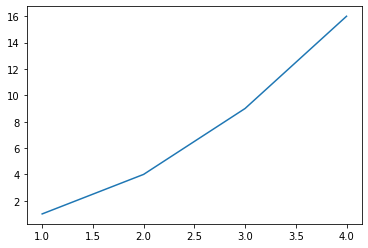

In [4]:
plt.plot(x, y)

`plot()` is a versatile command. We can see that the function takes the maximum values from both variables to decide the axes label range. Also, it automatically divides the axes into equal portions to plot the data. It can also take arbitrary number of arguments.<br>You can directly pass data to it as follows to get the same output.

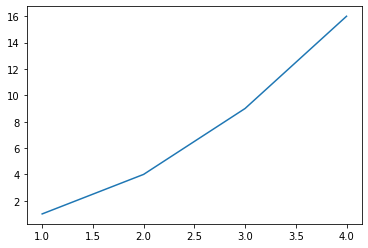

In [5]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Note that typically we also need to call `plt.show()` to display a plot, but thanks to the interactive Pyplot and `matplotlib inline` option, this step can be omitted and the plot will always appear automatically. On the other hand, this may not always be the desired behavior. Recall that a Jupyter file will record both the code cells and the outputs; therefore, if your notebook has many graphs, the file size will increase considerably. In order to not have plots show up automatically, we can change the matplotlib *backend* as follow:

In [6]:
%matplotlib agg
%matplotlib agg

In [7]:
plt.plot(x, y)

In this case, the figure does not appear automatically. The reason is that Matplotlib, as a plotting library, relies on a backend to actually render the plots. By changing the inline argument to agg, we changed the backend itself (but note that it has to be called twice to take effect). If we now call `show()`, we see that the figure does not appear either:

In [8]:
plt.show()

/Users/hn1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


You can experiment with other backend options [here](https://matplotlib.org/faq/usage_faq.html#what-is-a-backend). For now, let us switch back to interactive mode and continue with other features of matplotlib:

In [9]:
%matplotlib inline

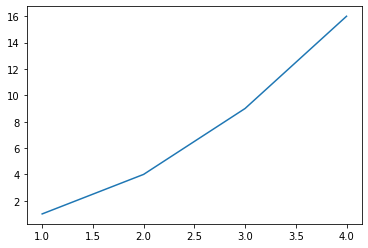

In [10]:
plt.plot(x, y)

## 2. Plot components in matplotlib 

There are two ways to use Matplotlib to generate plots. 
1. Let pyplot automatically create and manage the figures and axes, and use pyplot functions for plotting. 
1. Object-oriented way: explicitly create figures and axes objects and then call methods on them.

The second way naturally allows for more customization. Let's investigate a small example:

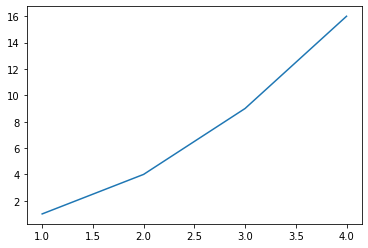

In [11]:
fig, ax = plt.subplots()  # a figure with a single Axes
ax.plot([1, 2, 3, 4], [1, 4, 9, 16])

There are 3 parts to this plot.<br> 
- First, we initiated an empty <b>figure</b> `fig = plt.figure()`, with no axes. This acts as a canvas and you can have any number of axes here in the form of subplots. It is especially useful when you want to have multiple plots on the same axis.

- Second is <b>axes</b>. It is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. Axes has several properties that can be modified as per requirement. Some are:
    - `figsize = (width, height)`: an argument to specify size of the figure
    - `set_xlim()`: to specify x-axis limits
    - `set_ylim()`: to specify y-axis limits
    - `set_title()`: to give an explanatory title to the plot
    - `set_xlabel()`: to give title to the x-axis
    - `set_ylabel()`: to give title to the y-axis

Note: These can also be used with the pyplot method using `plt.xlim()`, `plt.title()`, `plt.xlabel()` etc.

Text(0, 0.5, 'Limit of 2 units')

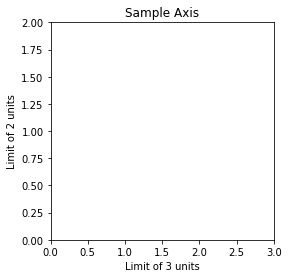

In [12]:
x = np.linspace(0, 2, 100)

# create a figure with a single Axes
fig, ax = plt.subplots(figsize = (4,4))
ax.set_xlim(xmin=0.0, xmax=3.0)
ax.set_ylim(ymin=0.0, ymax=2.0)
ax.set_title('Sample Axis')
ax.set_xlabel('Limit of 3 units')
ax.set_ylabel('Limit of 2 units')

- Third is a <b>subplot</b>. Within a single figure, you can have multiple plots. A tight layout automatically adjusts subplot parameters so that the subplots fit in to the figure area. Try commenting out the last line and see what happens.

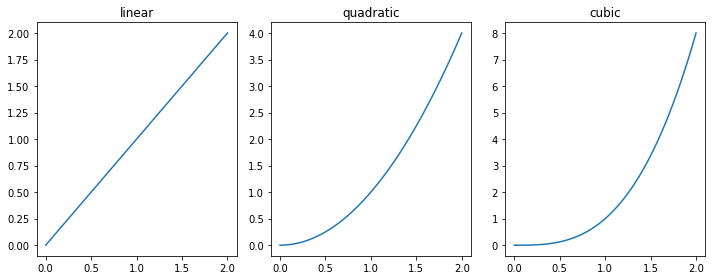

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))  # a figure with a 1x3 grid of Axes
ax1.plot(x, x)  # Plot x on the 1st subplot
ax1.set_title('linear')
ax2.plot(x, x**2)  # Plot square of x on the 2nd subplot
ax2.set_title('quadratic')
ax3.plot(x, x**3)  # Plot cube of x on the 3rd subplot
ax3.set_title('cubic')
fig.tight_layout()

More generally, the following image gives an excellent overview of all parts of a plot (source: [Matplotlib user guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)).
<img src="https://matplotlib.org/_images/anatomy.png">

Let us see an example where we plot 3 line plots on a single axes.<br>
<b>Exercise:</b> Try modifying the code below to include plots of more polynomial functions.

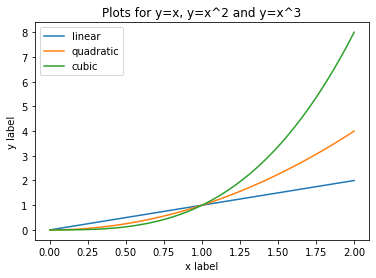

In [14]:
x = np.linspace(0, 2, 100) # numpy array of 100 evenly spaced numbers between 0 and 2

fig, ax = plt.subplots()  # Create a figure and an axes
ax.plot(x, x, label='linear')  # Plot x on the axes
ax.plot(x, x**2, label='quadratic')  # Plot square of x
ax.plot(x, x**3, label='cubic')  # Plot 3rd power of x
ax.set_xlabel('x label')  # Add an x-label to the axes
ax.set_ylabel('y label')  # Add a y-label to the axes
ax.set_title("Plots for y=x, y=x^2 and y=x^3")  # Add a title to the axes
ax.legend()  # Add a legend

We now consider a more complex example of constructing plots using pyplot vs object-oriented figures and axes. While you may have a preference for one way over the other, try to familiarize yourself with both so that you can easily read and modify any kind of matplotlib code.

For our example, let's visualize the distribution of a dataset in four different kinds of plot and present them side by side.

In [15]:
np.random.seed(1234)
data = np.random.randn(2, 100)

Using pyplot, we have the following code.

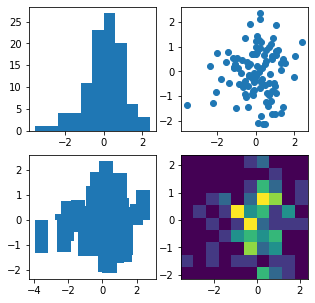

In [16]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.hist(data[0])
plt.subplot(2, 2, 2)
plt.scatter(data[0], data[1])
plt.subplot(2, 2, 3)
plt.bar(data[0], data[1])
plt.subplot(2, 2, 4)
plt.hist2d(data[0], data[1])
plt.show()

Here the parameters that we input to `plt.subplot` specify the number of rows, number of columns, and the plot index respectively. In this case we want a 2x2 grid so there are 2 rows, 2 columns, and the plot indexes go from 1 to 4. **Note that plot index starts from 1, not 0**.

Using figures and axes, we have the following code:

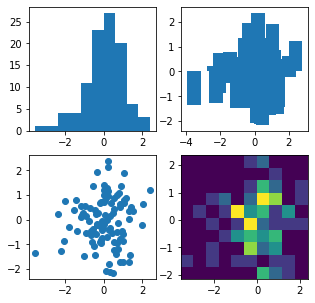

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].bar(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

Another option for multiple side-by-side plots is to have them together on the same graph. We can, for instance, utilize two y-axes or two x-axes. Matplotlib provides two methods called `twinx()` and `twiny()` to instantiate a second axis that shares the same x-axis or y-axis respectively (also called as a parasite axis).

In [18]:
# Data on number of immigrants in Canada from China and India since 1980 up to 2013
# source: https://www.kaggle.com/yakinrubaiat/canadian-immigration-from-1980-to-2013
path = "http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-matplotlib-seaborn-primer/immigration_data.csv"
data = pd.read_csv(path, index_col=0)
data.head()

,China,India
Year,,
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


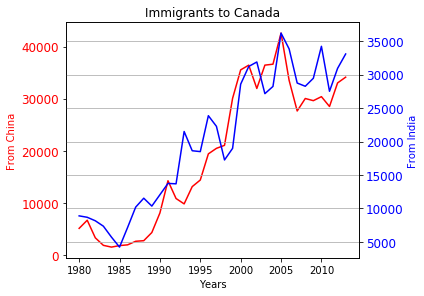

In [19]:
fig, ax1 = plt.subplots()
color = 'red'
ax1.set_xlabel('Years')
ax1.set_ylabel('From China', color=color)
ax1.plot(data['China'], color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('From India', color=color)  # we already handled the x-label with ax1
ax2.plot(data['India'], color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Immigrants to Canada')
plt.grid(b=None) # so that grids from both axes don't overlap
plt.show()

Plotting 2 things together makes it so easy to see a pattern. We can clearly see the similar immigration trend these countries share. And with the alternative y-axis, the plot is accurate as well. Note that while there is a difference in scaling between the two y axes, the overall trends over time are similar for both countries are similar.

You can explore the catalogue of plots provided by matplotlib <i><a href="https://matplotlib.org/gallery/index.html">here</a></i>.

## 3. Seaborn basics
<i>Reference - <a href = "https://seaborn.pydata.org/introduction.html">Introduction to Seaborn</a></i><br><br>
Let us look at another Python data visualization library based on matplotlib call seaborn. Seaborn library provides a high-level interface for drawing attractive and informative statistical graphics and is closely integrated with pandas data structures. If you like to have more colorful and convenient plots than the default matplotlib ones without needing much customization, seaborn can be a useful tool.


Let us go ahead and import the library. The latest version is 0.10.1

In [20]:
import seaborn as sns

Seaborn splits matplotlib parameters into two independent groups. The first group, called by `set_style()` and `axes_style()`, sets the aesthetic style of the plot, and the second group, `plotting_context()` and `set_context()`, scales various elements of the figure so that it can be easily incorporated into different contexts.

Let us bring some data to the table and start experimenting with seaborn. You will now see how seaborn integrates smoothly with pandas dataframes.

In [21]:
filepath="http://clouddatascience.blob.core.windows.net/m20-foundation-data-science/p2-matplotlib-seaborn-primer/social_media_inventory.csv"
df = pd.read_csv(filepath)
df.head()

,Department,Account Platform,Account Link
0,Animal Services Dept.,INSTAGRAM,https://www.instagram.com/austinanimalcenter/
1,Animal Services Dept.,TWITTER,https://twitter.com/austinanimals
2,Animal Services Dept.,FACEBOOK,https://www.facebook.com/AustinAnimalCenter/
3,Animal Services Dept.,YOUTUBE,https://www.youtube.com/channel/UC3Jt4NeLhgyJw...
4,Animal Services Dept.,FACEBOOK,https://www.facebook.com/mascotasdeaustin/


If we plot using the default matplotlib, we get something as follows

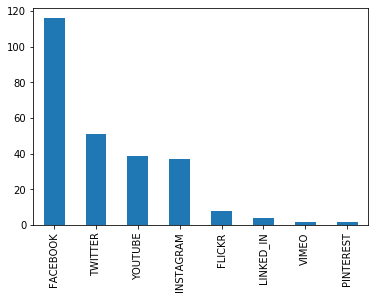

In [22]:
platform_count = df['Account Platform'].value_counts()
platform_count.plot(kind='bar')

Now, we bring in seaborn. Seaborn provides a myriad of options to beautify our plots. To start off, we will apply the default seaborn theme, scaling, and color palette, by calling `sns.set()`. This uses the matplotlib `rcParam` system and will affect how all matplotlib plots look, even if you don’t make them with seaborn. This step can be skipped if you prefer matplotlib defaults, however you can call this function independently between plots to control the color themes and styling of your plots.

In [23]:
sns.set()

Now if we generate the same matplotlib plot from before:

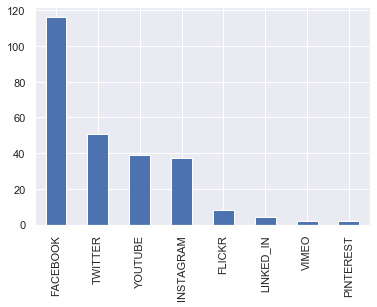

In [24]:
platform_count.plot(kind='bar')

This plot is now conforming to the seaborn style, with a darkgrid and no x or y ticks. We can modify it further using either matplotlib or seaborn settings. We can also construct the barplot from the seaborn library instead of matplotlib:

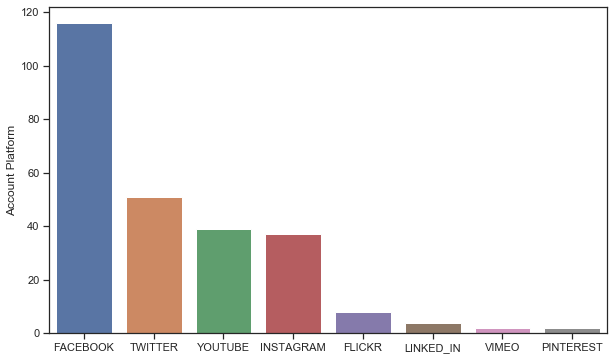

In [25]:
# bring back the x and y ticks with seaborn
sns.set(style="ticks")
count = df['Account Platform'].value_counts()
# setting figure size with matplotlib. this can also be done in seaborn:
# sns.set(rc={'figure.figsize':(10, 6)})
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = platform_count.index, y = platform_count)

We see that seaborn also assigns a different color to each group, which makes it look better! In addition, many seaborn functions can take as input your entire dataframe, so you don't have to extract the x-axis and y-axis values separately before the plotting. For example, we can input our original `df` into the `countplot` function to obtain the same plot, without having to pull out `df['Account Platform'].value_counts()`:

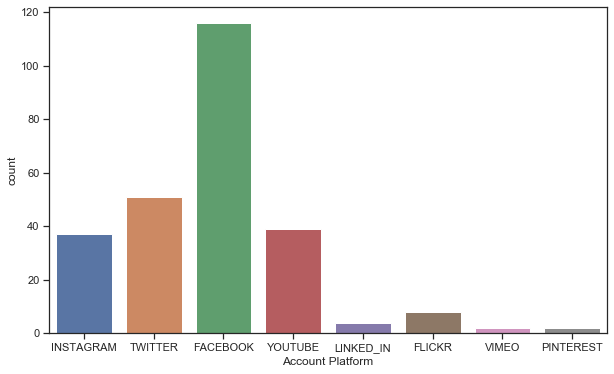

In [26]:
sns.set(style = "ticks", color_codes = True)
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Account Platform', data = df)

You can explore other palettes below. Substitute the string `"ocean"` with the following options, and see which one you like the most:
* `"Reds"`
* `"Blues"`
* `"deep"`
* `"colorblind"`
* `"pastel"`

For more details on choosing and customizing color palettes, refer to the [seaborn documentation](https://seaborn.pydata.org/tutorial/color_palettes.html).

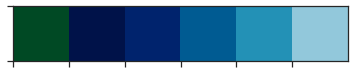

In [27]:
sns.palplot(sns.color_palette("ocean"))

If you cannot decide which colors to choose from, the below command would let you use an interactive tool to lead you to the right palette name, although you need to specify whether your data is <b>sequential, diverging or qualitative</b>. The `as_cmap` parameter, when `True`, will give you the colors as a continuous gradient instead of discrete colors as above. If you want discrete colors, `n` can be used to change the number of colors you want.<br><br><b>Note:</b> Qualitative palettes cannot be colormaps, because we need discrete colors for categorical data instead of a gradient. 

In [28]:
sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

## 4. Supported plot types

Following up on the data visualization primer, here we introduce a number of common plot types and how they are constructed in seaborn.

### 4.1. Scatter plot

<a href="https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial">Reference: *Seaborn Tutorial*</a>

In this section, we will use one of seaborn's built-in dataset called `tips`, which includes records of all transactions in a restaurant. Here is an overview of the dataset:

In [29]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The scatterplot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset.
<br><br><b>relplot()</b> is a useful function to show relationship between variables. It plots scatterplot by default, and lineplot if we specify kind as "line". It can represent complex datasets because it can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

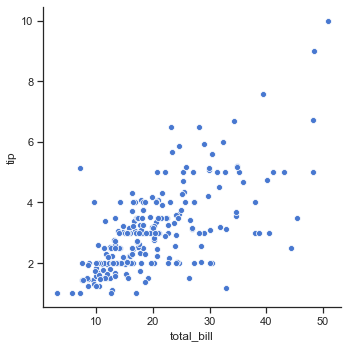

In [30]:
sns.set_palette("muted")
sns.relplot(x="total_bill", y="tip", data=tips)

Another dimension can be added to the plot by coloring the points according to a third variable. One way to do this in seaborn, is to change the markers to represent different categories. Notice the style and markers parameters.

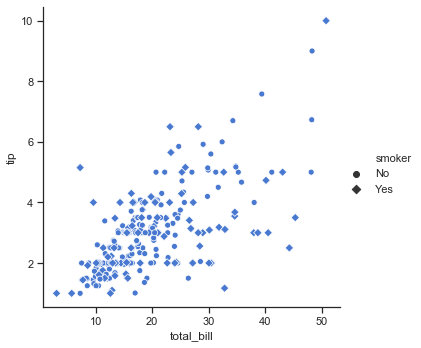

In [31]:
sns.relplot(x="total_bill", y="tip", style="smoker", markers=["o", "D"], data=tips)

A better way to do this would be to change colors. This can be done by using a “hue semantic”, because the color of the point gains meaning.

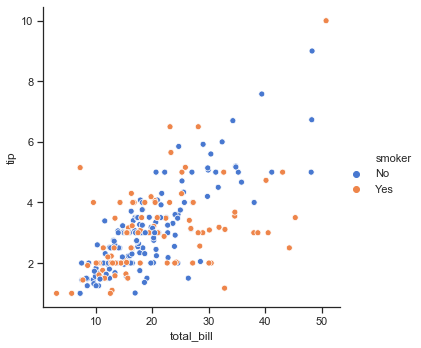

In [32]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color.

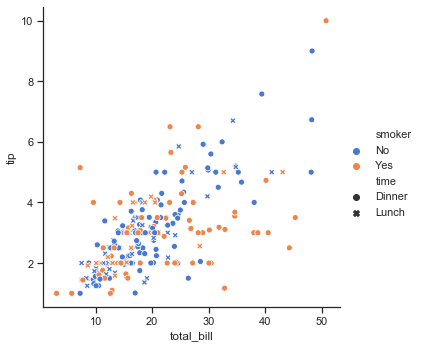

In [33]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

Recall that we needed to specify our data as either sequential, diverging or qualitative to select a palette. In the above example, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric, the default coloring switches to a sequential palette.

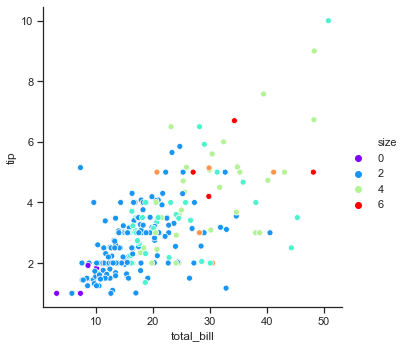

In [34]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette="rainbow")

You can also explicitly specify a palette through the `palette` parameter in the same function code.<br>The third kind of semantic variable changes the size of each point:

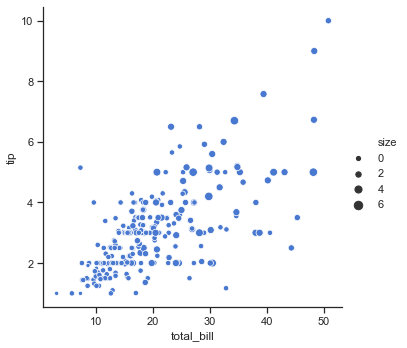

In [35]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

The size of the circles can be customized by adding a size parameter, for example, size = (10, 100). This will normalize the range of the variable between 10 and 100. <br><br> When a relationship between two variables depends on more than one other variable, we can make more than one plot. Because `relplot()` is based on the `FacetGrid`, this is easy to do.

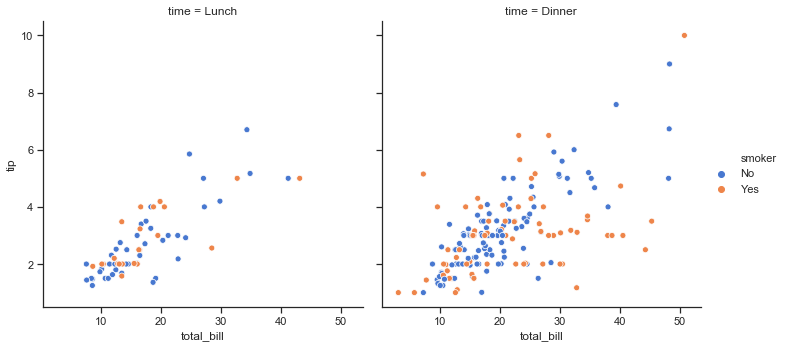

In [36]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is also possible to enhance a scatterplot to include a linear regression model (and its uncertainty) using lmplot()

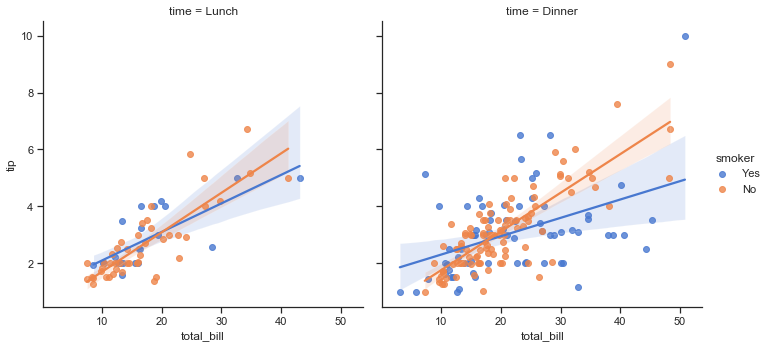

In [37]:
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker", data=tips)

Note that while a scatterplot by default only supports two-dimensional data (with the x-axis and y-axis), in the examples below we have managed to incorporate additional dimensions (or more precisely, their discretized versions) through the use of color, point size and side-by-side graphs. These are important visualization tricks for you to remember, as real-world data is rarely two-dimensional.

### 4.2. Line Plot

To understand the changes in one variable as a function of another, a good choice is to draw a <b>line plot</b>. Lineplots can be drawn either directly by the lineplot() function, or with `relplot()` by setting `kind="line"`.

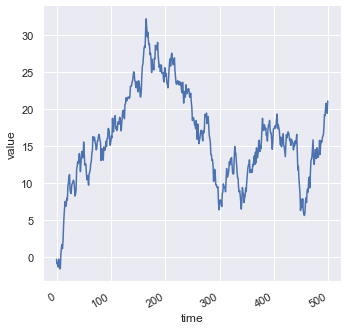

In [38]:
sns.set(style="darkgrid")
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() # to rotate and align the x-tick labels so they look better

Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled

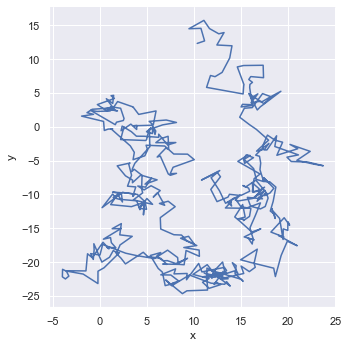

In [39]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)

### 4.3. Categorical Plots

<a href = "https://seaborn.pydata.org/tutorial/categorical.html">Reference: *Seaborn documentation*</a>

Similar to `relplot()`, `catplot()` exposes a common dataset-oriented API that generalizes over different representations of the relationship between one numeric variable and one or more categorical variables. <b>`catplot()`</b> gives a unified higher-level access to axes level functions through a figure-level interface. We can classify the categorical plots as one of the following groups:

- Categorical Scatterplot:
    - `stripplot()` (kind="strip"; the default)
    - `swarmplot()` (kind="swarm")<br><br>
- Categorical Distribution plot:
    - `boxplot()` (kind="box")
    - `violinplot()` (kind="violin")
    - `boxenplot()` (kind="boxen")<br><br>
- Categorical Estimate plot:
    - `pointplot()` (kind="point")
    - `barplot()` (kind="bar")
    - `countplot()` (kind="count")<br>

For example, to make a boxplot, you can either call `sns.boxplot(x = ..., y = ...)`, or you can call `sns.catplot(x = ..., y = ..., type = "box")`. If you do not specify the `type`, then `catplot` is equivalent to `stripplot`, which is its default tyle.

We already saw the Categorical Estimate plot group earlier. Let us explore the Scatterplot and Distribution plot groups here:

#### 4.3.1. Categorial scatterplot
One challenge in plotting categorical data is that all points of the same category would appear at the same position on the axis. Below are two different categorical scatter plots in seaborn that solve this problem.

`stripplot()`, which is the default version of `catplot()`, adjusts the positions of data points by introducing random jitter.

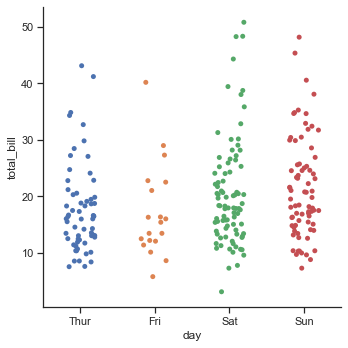

In [40]:
# jitter parameter controls the amount of randomness of data points. It takes an integer value. False disables it.
sns.set(style="ticks")
sns.catplot(x="day", y="total_bill", jitter=0.2, data=tips)

On the other hand, `swarmplot()` prevents the data points from overlapping and works best with small datasets. There is no need to control jitter here, so it does not support that parameter. Also notice the use of palatte here. A gradient palette could be confusing for the audience. It is important to use visual cues carefully.

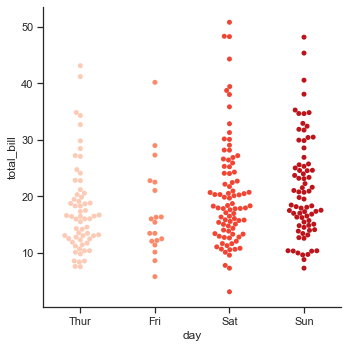

In [41]:
sns.catplot(x="day", y="total_bill", kind="swarm", palette="Reds", data=tips)

We can also add another dimension using the hue semantic.

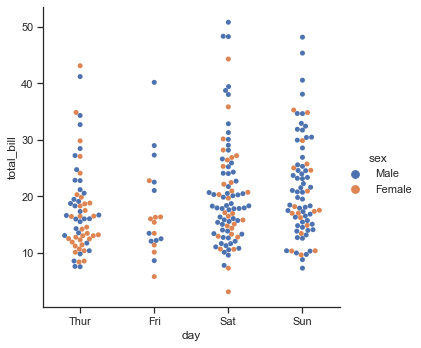

In [42]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

In the above example, notice the x-axis labels. They are qualitative. We can also use numerical data to categorize the data, and in that case, it will be sorted on the x-axis.

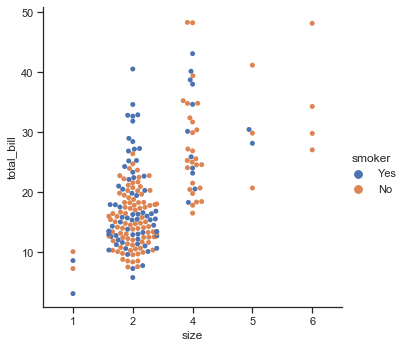

In [43]:
sns.catplot(x="size", y="total_bill", kind="swarm", hue="smoker", data=tips.query("size != 3"))

### 4.3.2. Categorical distribution plot

Each different figure-level plot kind combines a particular “axes-level” function with the FacetGrid object. For example, the scatter plots are drawn using the `scatterplot()` function, and the bar plots are drawn using the `barplot()` function. These functions are called “axes-level” because they draw onto a single matplotlib axes and don’t otherwise affect the rest of the figure.<br><br>With large datasets, you might want to look at the distribution within the categories. Boxplots represent three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 Interquartile Ranges of the lower and upper quartile, and then observations that fall outside this range are displayed independently.

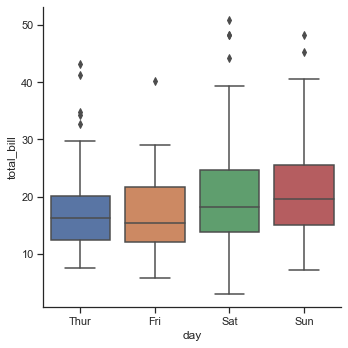

In [44]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

Again, a hue semantic maybe used to add another variable to the plot.

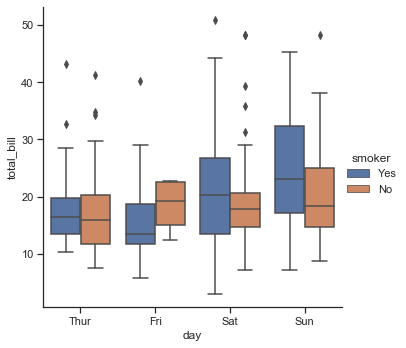

In [45]:
sns.catplot(x="day", y="total_bill", kind="box", hue="smoker", data=tips)

While boxplot visualizes the important statistical measures (e.g., Q1, Q3, median, min, max), it does not show the actual shape of the data (e.g., are there more data points around the median than around Q3?). To address this issue, violin plots combine a boxplot with the kernel density estimation. Instead of plotting all the data points on the same level as in a swarmplot, we increase the area away from the center of the violin to show density at that y-axis level. The central spine on the violin shows median and 1st and 3rd quartiles.

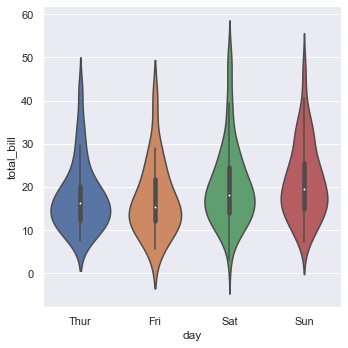

In [46]:
sns.set(style="darkgrid")
sns.catplot(x="day", y="total_bill", kind="violin", data=tips);

Because of the kernel estimation, the violins can extend beyond the actual data range. For example, the violin for Saturday also includes negative values, whereas the underlying data (shown in the central spine) are all positive. We can restrict the violin to only the true data range by specifying `cut = 0`:

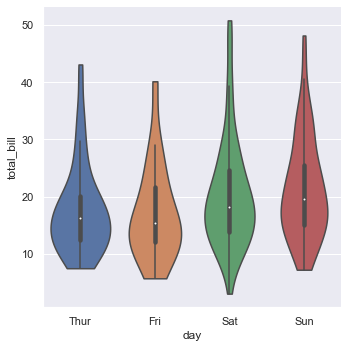

In [47]:
sns.set(style="darkgrid")
sns.catplot(x="day", y="total_bill", kind="violin", data=tips, cut = 0);

Again, it is possible to add another dimension to the plot by adding hue. However, you may realize that bulge on just one side of the violin will essentially relay the same information about density, leaving the other side to be used for another variable.

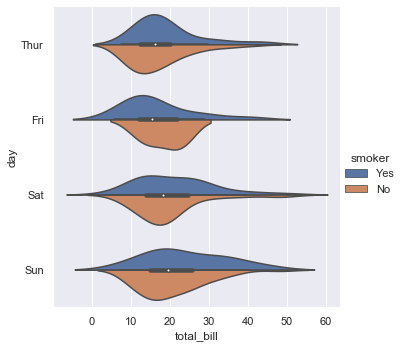

In [48]:
sns.catplot(x="total_bill", y="day", hue="smoker", kind="violin", split=True, data=tips);

It is also possible to combine 2 types of plots

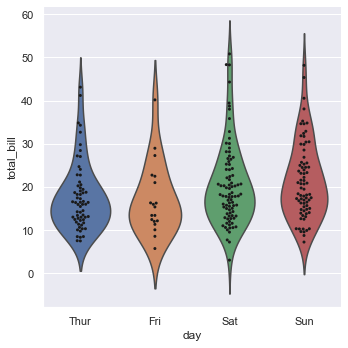

In [49]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

### 4.4. Heatmaps

<i><a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">Reference: Seaborn tutorial</a></i>

Working with datasets gets trickier when number of variables increases too much. There is a limit on how many dimensions we can add using shapes, to a scatter plot, for example. Colors can help us here. There are millions of colors which can add dimensionality to a plot.<br>Heatmaps are used when data varies with variation in 2 independent variables. The best part is that it can be either discrete or continuous, we don't have to worry about running out of colors.

In [50]:
# sns sample dataset where number of passengers may depend on year, month or both
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [51]:
# pivot table to make data concise; this is a better representation than having repeating rows for years and months
flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


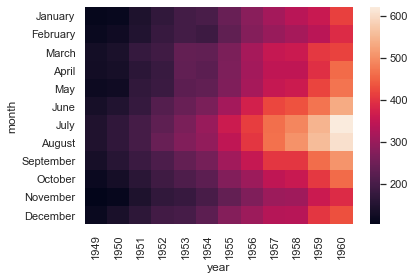

In [52]:
ax = sns.heatmap(flights)

Study the heatmap. It is clear that number of passengers has an increasing trend towards the later years, but mostly during the middle of the year, around July. The trend is almost symmetrical about July. This information will help the airlines form business strategies and decide on promotional offer periods.<br>If you are more of a discrete person, you can also mark clear boundaries by increasing linewidth between each small box and add numbers that each color represents.<br><br><b>Note:</b> Notice how this is a good use case for a continuous or gradient color palette.

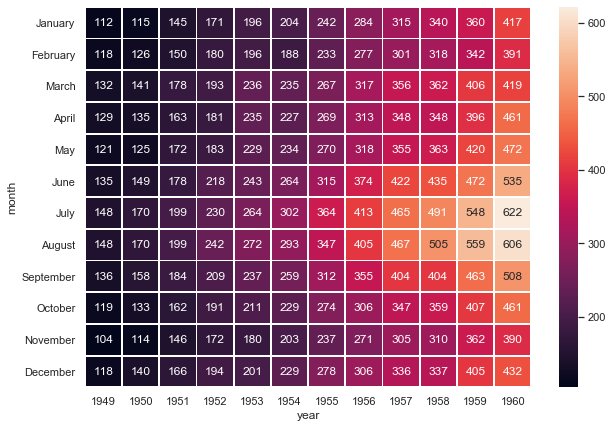

In [53]:
# linewidth can also be an integer value; annot adds annotations and fmt formats the numbers as integers
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(flights, linewidths=.9, annot=True, fmt="d")

Nice and elegant.<br>Since we have the annotations, the colorbar is redundant. Let us add a title and of course you can change the colors of the heatmap as well.

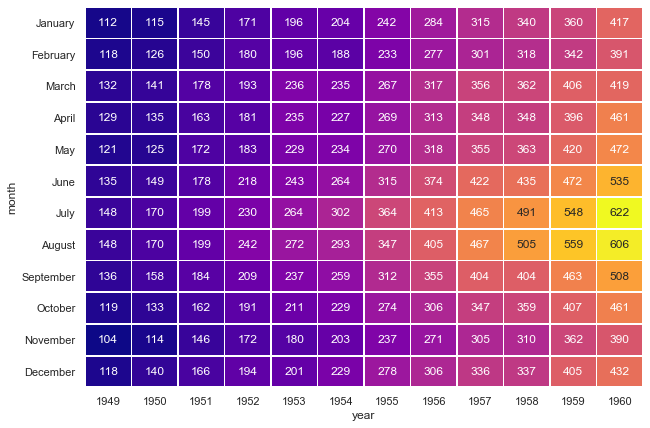

In [54]:
fig1, ax1 = plt.subplots(figsize=(10,7))
sns.heatmap(flights, cmap="plasma", cbar=False, linewidths=.9, annot=True, fmt="d")

<b>Notes:</b><br>By  now, you would have realized that you can switch the x and y parameters to make the plots vertically or horizontally oriented.

You can find other ways to see how your data is distributed <i><a href="https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial">here</a></i>.

### 4.5. Representing Uncertainty

<a href="https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial">*Seaborn Tutorial*</a>

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean.

In [55]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


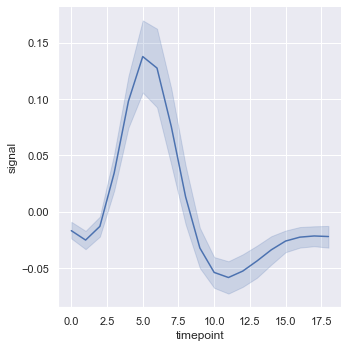

In [56]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them

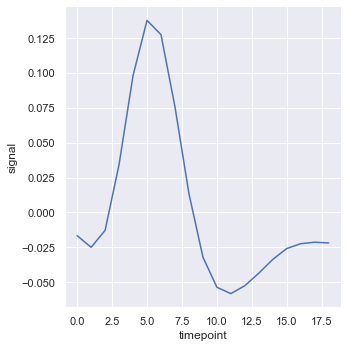

In [57]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

We can also represent the spread of the distribution at each timepoint by plotting the standard deviation instead of confidence intervals

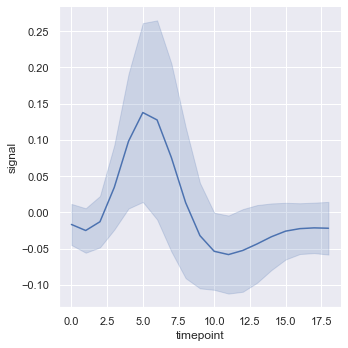

In [58]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

The lineplot() function has the same flexibility as scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements.

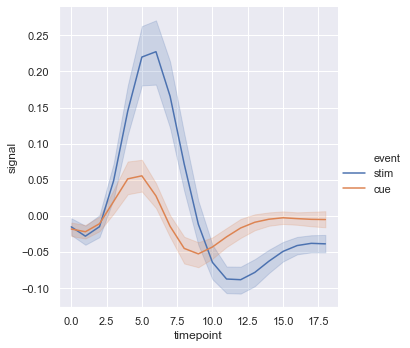

In [59]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

It can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness

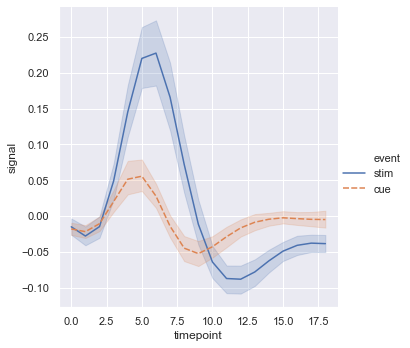

In [60]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", kind="line", data=fmri)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default

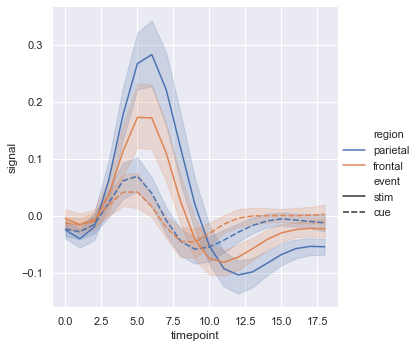

In [61]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)

### 4.5. Bar Plots

<i><a href="https://seaborn.pydata.org/examples/horizontal_barplot.html">Reference: Seaborn tutorial</a></i>

Study the following bar graph, in particular how informative it is with only a few lines of code. For this plot, we use the sample car crash dataset from seaborn.

In [62]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


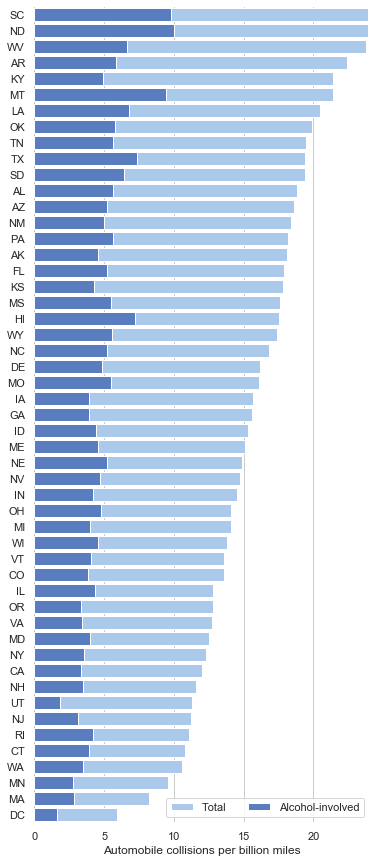

In [63]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes, label="Total", color="b") # Color blue is "b" in matplotlib shorthand

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes, label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Automobile collisions per billion miles")

# remove axis lines for better visuals
sns.despine(left=True, bottom=True)

## 5. Remarks

We have provided a brief introduction to two versatile visualization tools in Python: Matplotlib and Seaborn. Along with Numpy and Pandas, they constitute the core data science toolkit that you should master. An important point to note is that there is no "matplotlib vs seaborn" -- as you have seen, the two are closely integrated, and you would typically use both together for maximum customization.

Finally, we outline some additional resources in case you'd like to learn more:
- <i><a href="https://python-graph-gallery.com/">Python graph gallery</a></i>
- <i><a href="https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/">Top 50 matplotlib visualizations</a></i>
- <i><a href="https://www.edwardtufte.com/tufte/">Work of Edward Tufte</a></i>